<a href="https://colab.research.google.com/github/evroth/Yelp_Analytics/blob/main/Yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID Impact on Restaurant Ratings




##By David Ma and Evan Roth



##**Introduction**

This notebook examines the impact of COVID-19 on restaurants' Yelp ratings. Yelp reviews data from 2019 to 2022 is being used to conduct this analysis.

##**Hypothesis**

Restaurants' Yelp star ratings will be greatly impacted due to COVID lockdowns. We think most restaurant will receive decreases in ratings after COVID. Some initial reasoning behind our hypothesis is there was a struggle to hire low-wage workers after a few rounds of government stimulus- leading to overworked staff and thus a reduction in customer service. With this analysis, we want to look at how average ratings change for restaurants as a whole, as well as how a restaurant's reviews changed from before and to after the pandemic began.

##About

We gather Yelp data from Yelp directly:
https://www.yelp.com/dataset

Each file is composed of a single object type, one JSON-object per-line. Where "business.json" Contains business data including location data, attributes, and categories. "review.json" Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

##Json file cleaning process

Due to the large size of the review and business file, it was difficult to upload online to be ran. See the script in the repository named _"parse_reviews.py"_ and _"parse_businesses.ipynb"_ to see how the data was filtered down to a useable size, output from it is _"reviews.csv"_.

 Below is a snippet of the structure of the json file for reference of the data it contains.


    
    // string, 22 character unique string business id
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // string, the business's name
    "name": "Garaje",

    // string, the full address of the business
    "address": "475 3rd St",

    // string, the city
    "city": "San Francisco",

    // string, 2 character state code, if applicable
    "state": "CA",

    // string, the postal code
    "postal code": "94107",

    // float, latitude
    "latitude": 37.7817529521,

    // float, longitude
    "longitude": -122.39612197,

    // float, star rating, rounded to half-stars
    "stars": 4.5,

    // integer, number of reviews
    "review_count": 1198,

    // integer, 0 or 1 for closed or open, respectively
    "is_open": 1,

    // object, business attributes to values. note: some attribute values might be objects
    "attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
    },

Below is the format of the massive reviews json file and the data it contains.

    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0

## Exploratory Analysis


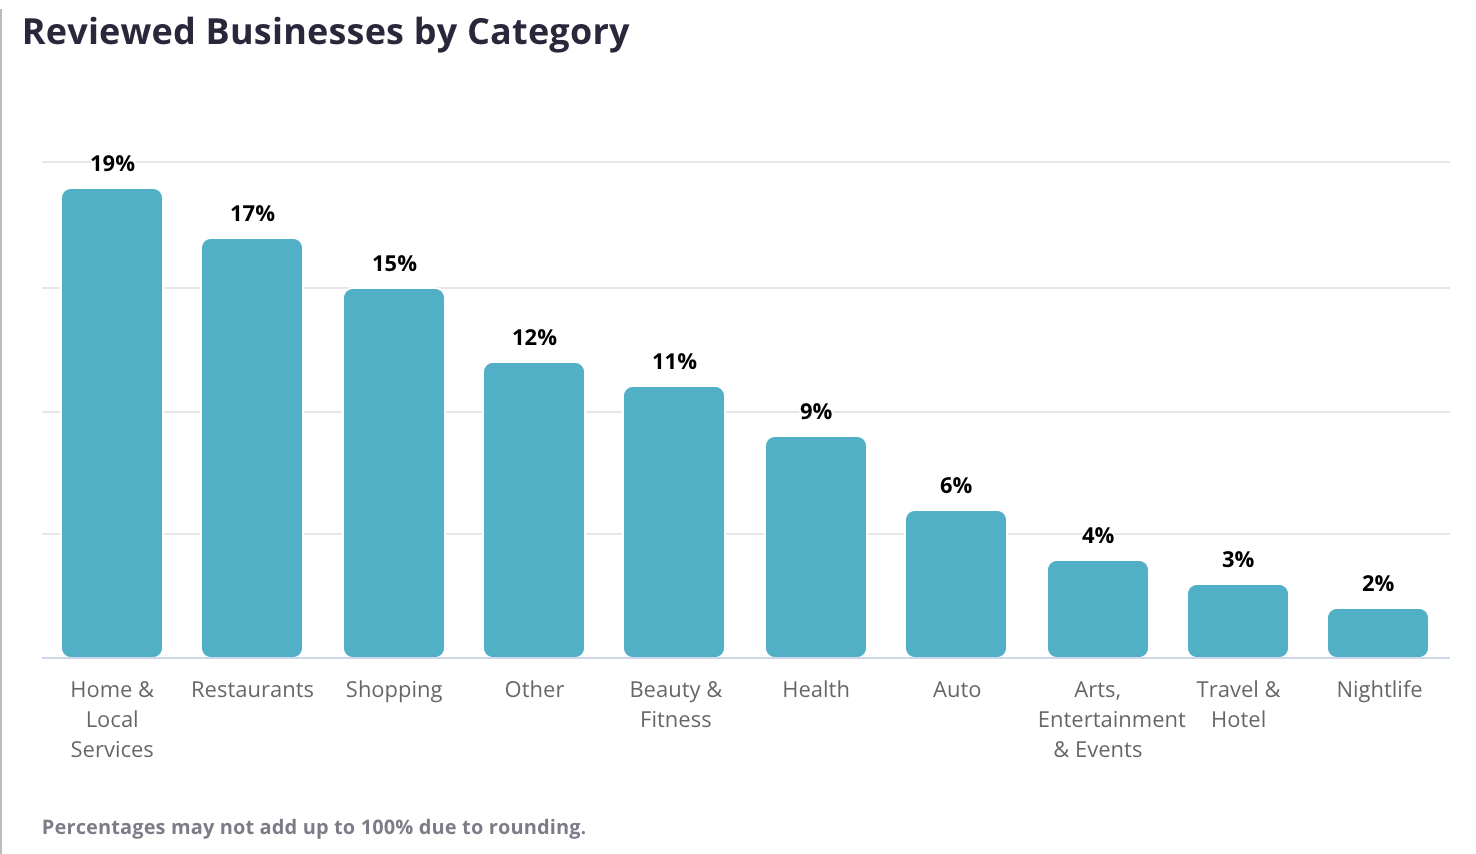

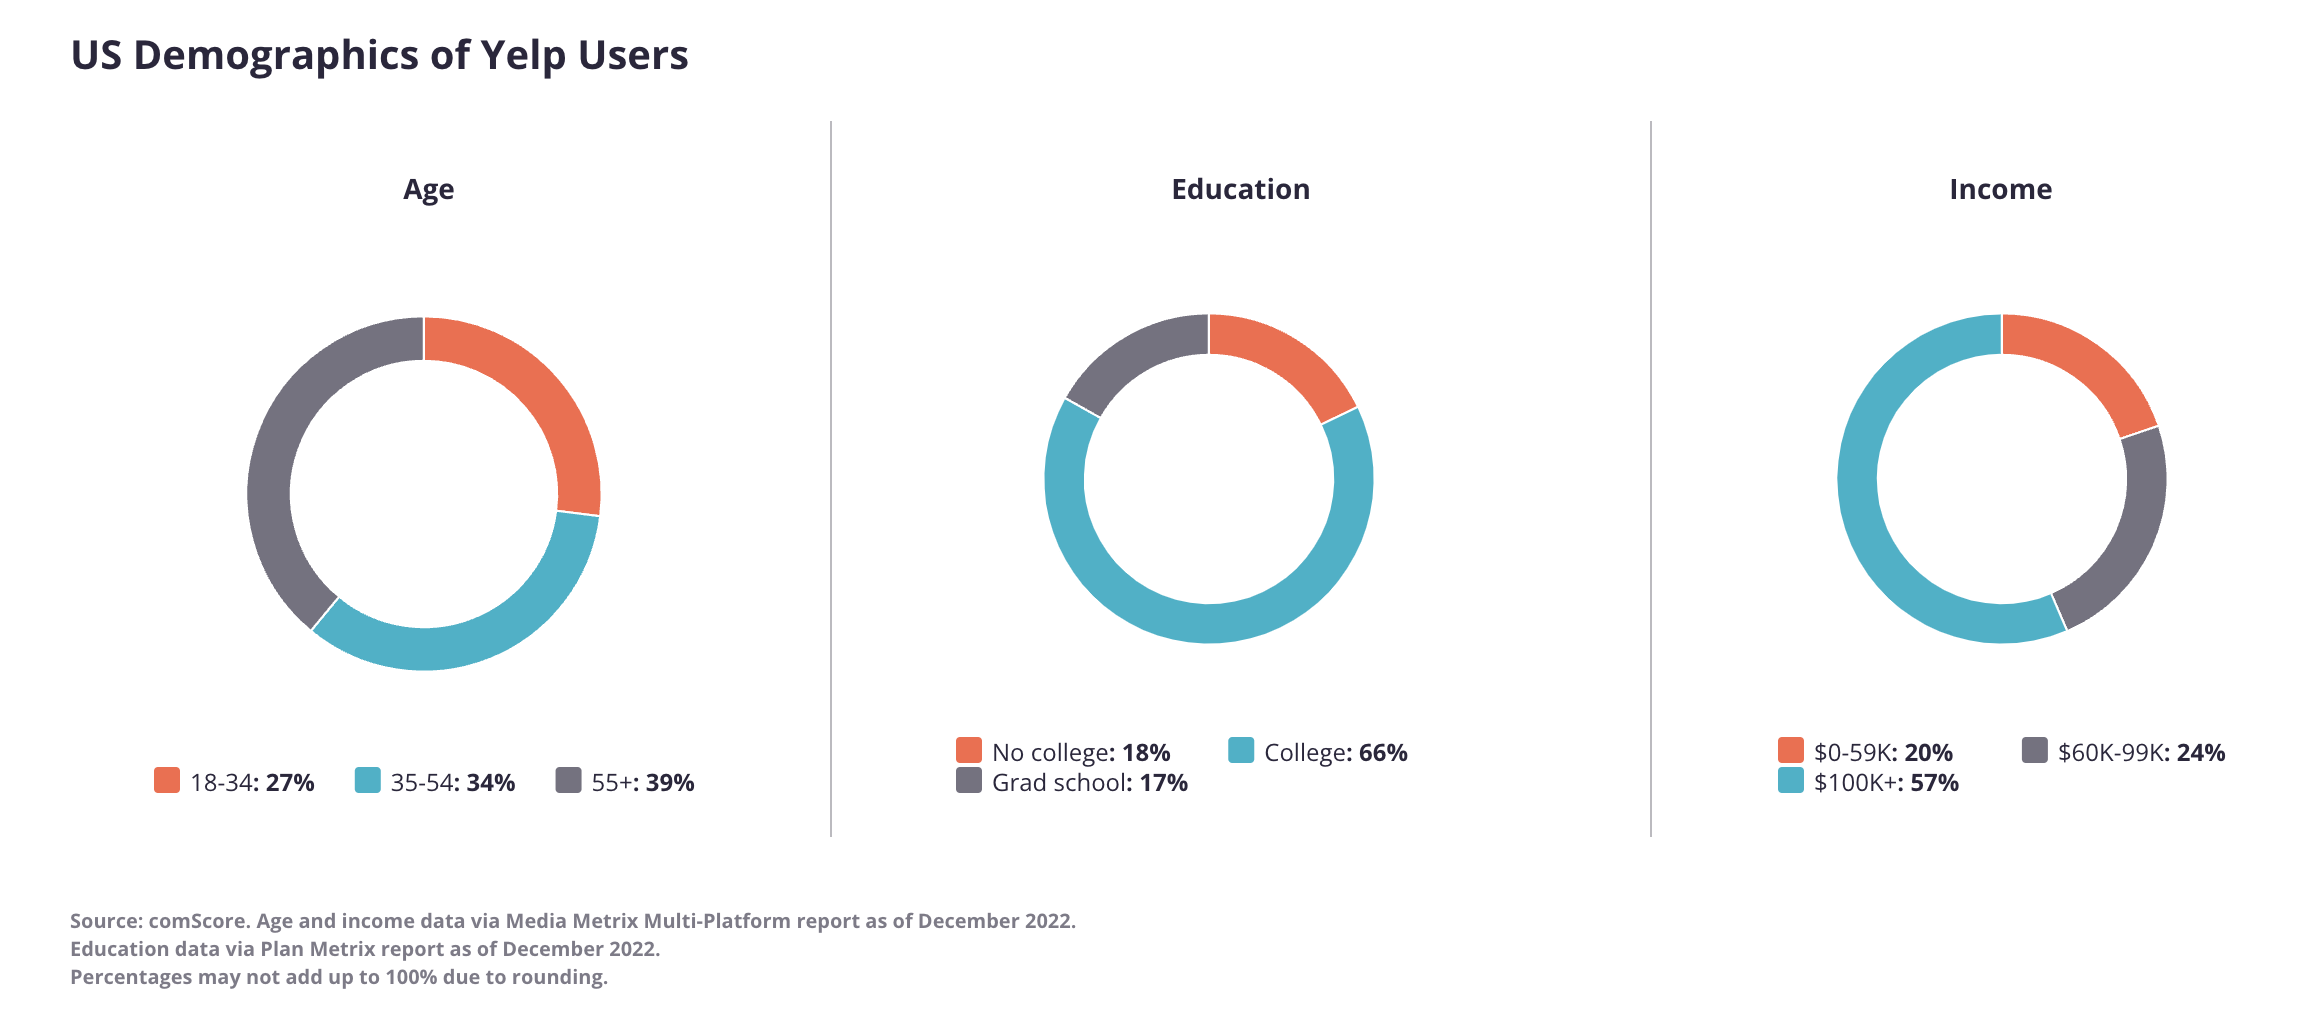

The tables above are taken from _"https://www.yelp-press.com/company/fast-facts/default.aspx"_.

__Diving into the data__

To investigate whether COVID-19 impacted business ratings- particulary on restaurants. Let's look at the trends of average review by date. 

This data was for just restaurants and code is found in _"filtered_reviews.py"_ located in the repo. It was created by joining the _"restaurants.csv"_ outputted from _"parse_businesses.ipynb"_ with all the reviews from the original yelp _"reviews.json"_. Then it was aggregated to average rating for the day for all restaurants.

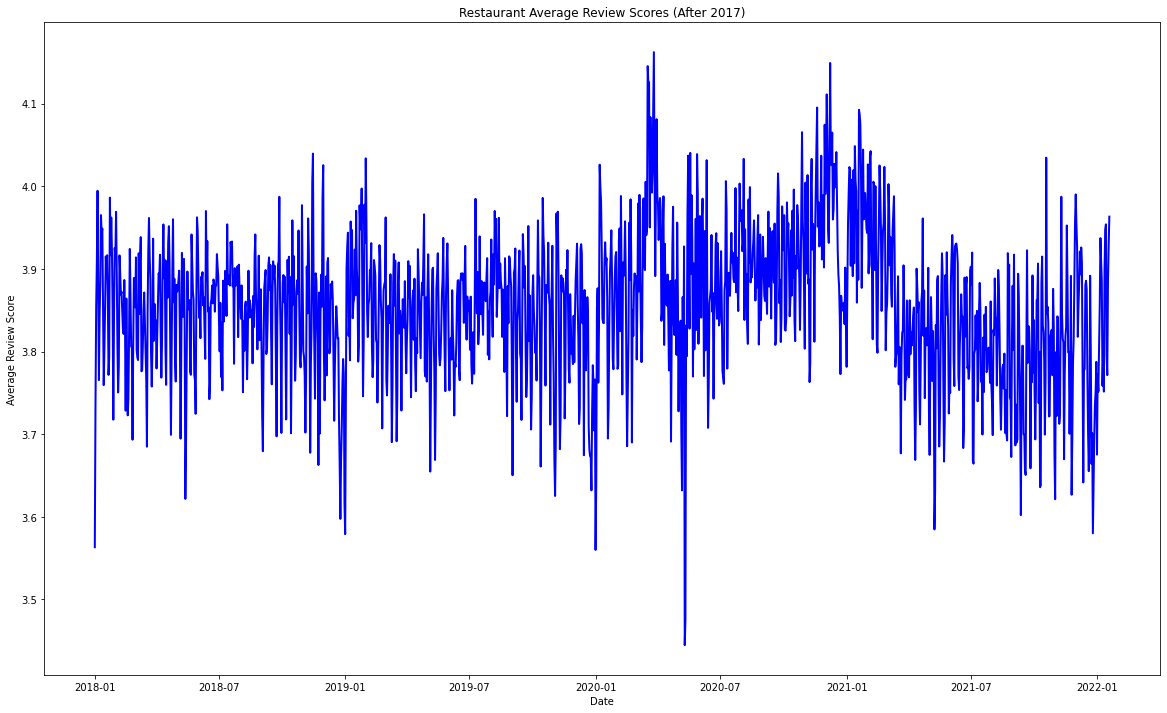

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('restaurant_avg_reviews_by_date.csv')

# Convert the 'date' column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort the DataFrame by the 'date' column in ascending order
df = df.sort_values('date', ascending=True)

# Reset the index of the DataFrame to match the new order
df = df.reset_index(drop=True)

# Filter the DataFrame to include only reviews with a date in or after 2017
df = df[df['date'].dt.year >= 2018]

# Plot the time series of average review scores over time
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.date, df.avg_review, linewidth=2, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Average Review Score')
ax.set_title('Restaurant Average Review Scores (After 2017)')

plt.show()

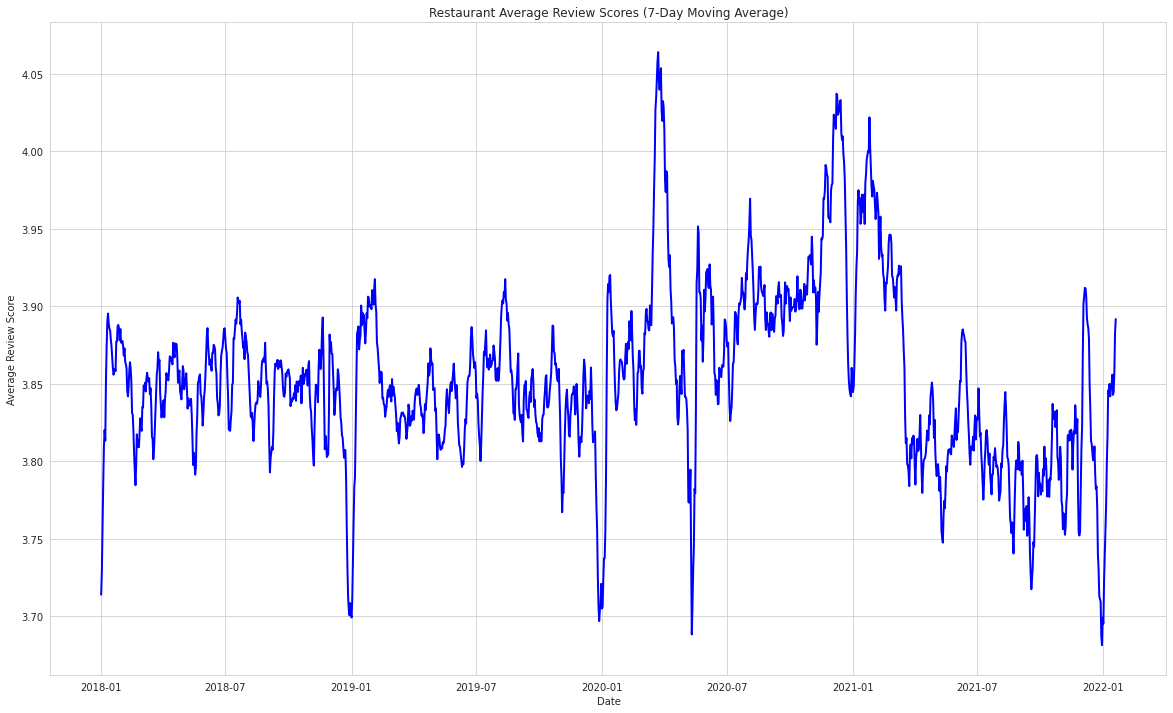

In [68]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('restaurant_avg_reviews_by_date.csv')

# Convert the 'date' column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort the DataFrame by the 'date' column in ascending order
df = df.sort_values('date', ascending=True)

# Calculate 7-day rolling mean of average reviews
df['7_day_avg'] = df['avg_review'].rolling(window=7).mean()

# Filter the DataFrame to include only reviews with a date in or after 2018
df = df[df['date'].dt.year >= 2018]

# Plot the time series of 7-day moving average review scores over time
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.date, df['7_day_avg'], linewidth=2, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Average Review Score')
ax.set_title('Restaurant Average Review Scores (7-Day Moving Average)')

plt.show()

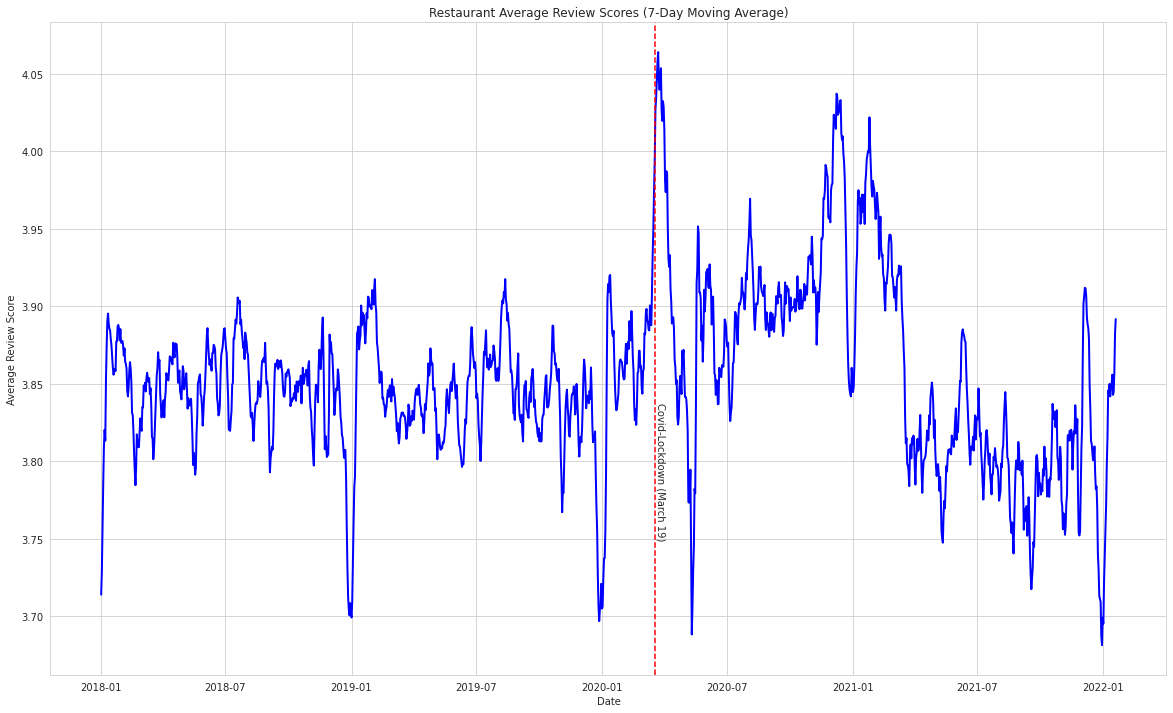

In [74]:
# Plot the time series of 7-day moving average review scores over time
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.date, df['7_day_avg'], linewidth=2, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Average Review Score')
ax.set_title('Restaurant Average Review Scores (7-Day Moving Average)')

# Add a vertical line to show COVID lockdown start
ax.axvline(pd.to_datetime('2020-03-19'), color='red', linestyle='--')
ax.text(pd.to_datetime('2020-03-19'), 3.75, 'Covid-Lockdown (March 19)', rotation=-90)

plt.show()

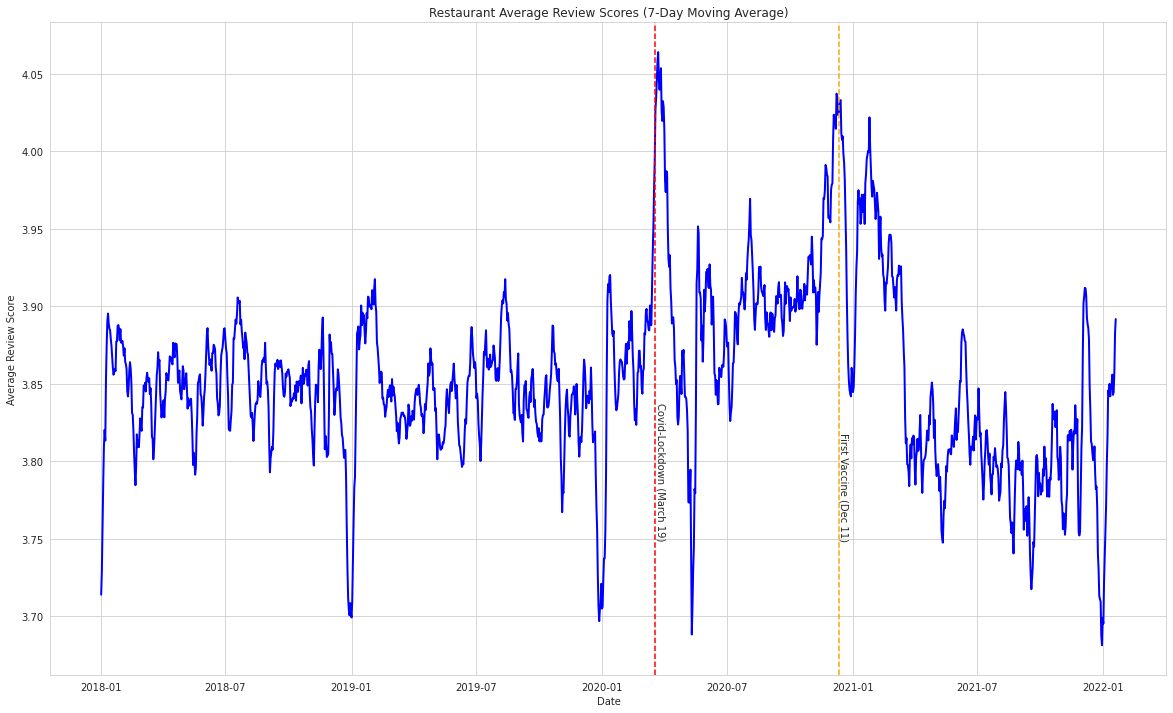

In [76]:
# Plot the time series of 7-day moving average review scores over time
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.date, df['7_day_avg'], linewidth=2, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Average Review Score')
ax.set_title('Restaurant Average Review Scores (7-Day Moving Average)')

# Add a vertical line to show COVID lockdown start
ax.axvline(pd.to_datetime('2020-03-19'), color='red', linestyle='--')
ax.text(pd.to_datetime('2020-03-19'), 3.75, 'Covid-Lockdown (March 19)', rotation=-90)

# Add a vertical line to show first vaccine
ax.axvline(pd.to_datetime('2020-12-11'), color='orange', linestyle='--')
ax.text(pd.to_datetime('2020-12-11'), 3.75, 'First Vaccine (Dec 11)', rotation=-90)

plt.show()

Quick glance at the average of the averages:

In [12]:
# Calculate the average review score for values less than and greater than March 21st, 2020
before_avg = df[df['date'] < pd.to_datetime('2020-03-19')]['avg_review'].mean()
after_avg = df[df['date'] >= pd.to_datetime('2021-03-19')]['avg_review'].mean()
print(before_avg)
print(after_avg)

3.846435726199826
3.8037018277817105


From this graph we can see a clear change in the review patterns when lockdowns hit.

Let us compare quickly to the average ratings for all businesses over the same time period.

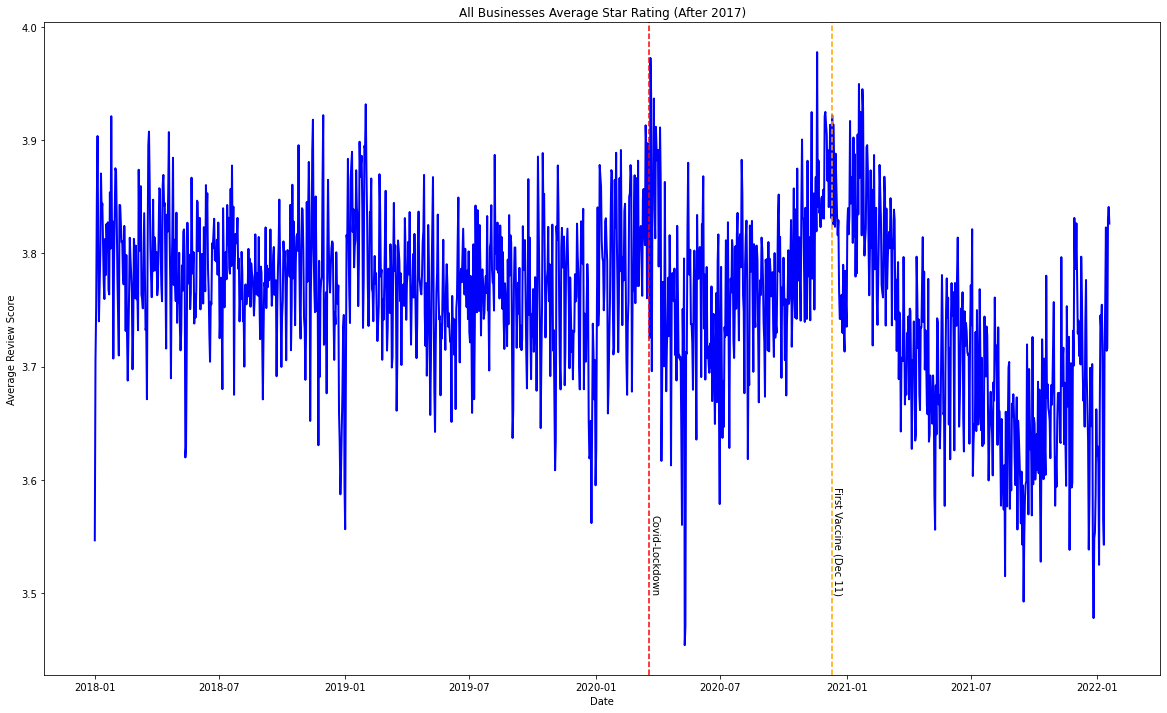

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('avg_reviews_by_date.csv')

# Convert the 'date' column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sort the DataFrame by the 'date' column in ascending order
df = df.sort_values('date', ascending=True)

# Reset the index of the DataFrame to match the new order
df = df.reset_index(drop=True)

# Filter the DataFrame to include only reviews with a date in or after 2017
df = df[df['date'].dt.year >= 2018]

# Plot the time series of average review scores over time
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.date, df.avg_review, linewidth=2, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Average Review Score')
ax.set_title('All Businesses Average Star Rating (After 2017)')

# Add a vertical line to show COVID lockdown start
ax.axvline(pd.to_datetime('2020-03-19'), color='red', linestyle='--')
ax.text(pd.to_datetime('2020-03-19'), 3.5, 'Covid-Lockdown', rotation=-90)

# Add a vertical line to show first vaccine
ax.axvline(pd.to_datetime('2020-12-11'), color='orange', linestyle='--')
ax.text(pd.to_datetime('2020-12-11'), 3.5, 'First Vaccine (Dec 11)', rotation=-90)


plt.show()

Date for percise start of lockdowns from _"https://www.timeanddate.com/holidays/us/lockdown-day-1"_

Date for first vaccine rollout from _"https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine"_

##Yelp Reviews and Restaurant Data

Get filtered_reviews from the file _"make_smaller_filtered_reviews.py"_

Get restaurant data from _"parse_businesses.ipynb"_


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
# load the average star rating data
reviews_df = pd.read_csv("filtered_reviews.csv")
restaurants_df = pd.read_csv("restaurants.csv")

In [20]:
# remove columns from restaurants
restaurants_df= restaurants_df.drop(["Unnamed: 0","stars", "review_count"], axis=1)

In [21]:
restaurants_df.head(10)

,business_id,name,city,state,postal_code,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,37015,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,MO,63123,0,"Pubs, Restaurants, Italian, Bars, American (Tr..."
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,TN,37207,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602,1,"Vietnamese, Food, Restaurants, Food Trucks"
5,il_Ro8jwPlHresjw9EGmBg,Denny's,Indianapolis,IN,46227,1,"American (Traditional), Restaurants, Diners, B..."
6,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,Largo,FL,33771,0,"Food, Delis, Italian, Bakeries, Restaurants"
7,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,1,"Sushi Bars, Restaurants, Japanese"
8,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,1,"Korean, Restaurants"
9,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,Edmonton,AB,T5J 1B9,0,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re..."


In [23]:
print(reviews_df)

         Unnamed: 0             business_id  stars                 date
0                 0  XQfwVwDr-v0ZS3_CbbE5Xw    3.0  2018-07-07 22:09:11
1                17  cPepkJeRMtHapc_b2Oe_dw    4.0  2018-07-17 03:30:07
2                27  kq5Ghhh14r-eCxlVmlyd8w    5.0  2018-08-23 21:39:38
3                28  Zx7n8mdt8OzLRXVzolXNhQ    5.0  2018-04-27 23:03:21
4                35  I6L0Zxi5Ww0zEWSAVgngeQ    4.0  2018-07-07 20:50:12
...             ...                     ...    ...                  ...
2007014     4724464  uMVOtr16r1ELu46pWr4HCQ    1.0  2022-01-18 06:42:59
2007015     4724465  fcGexL5VH5G2Xw0tRj9uOQ    3.0  2018-03-13 13:54:48
2007016     4724467  e_E-jq9mwm7wk75k7Yi-Xw    5.0  2022-01-17 22:36:01
2007017     4724469  Rr9kKArrMhSLVE9a53q-aA    5.0  2022-01-19 18:59:27
2007018     4724470  VAeEXLbEcI9Emt9KGYq9aA    3.0  2018-01-02 22:50:47

[2007019 rows x 4 columns]


##Merge the Data

In [24]:
# merge by business_id
df = pd.merge(reviews_df, restaurants_df, on = "business_id")

In [26]:
# drop weird column with id thing
df = df.drop(["Unnamed: 0"], axis=1)

In [31]:
# print df
df.head()

,business_id,stars,date,name,city,state,postal_code,is_open,categories
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-07 22:09:11,Turning Point of North Wales,North Wales,PA,19454,1,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-03-24 17:50:37,Turning Point of North Wales,North Wales,PA,19454,1,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,2018-07-21 09:26:33,Turning Point of North Wales,North Wales,PA,19454,1,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,XQfwVwDr-v0ZS3_CbbE5Xw,1.0,2018-09-08 17:03:53,Turning Point of North Wales,North Wales,PA,19454,1,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,2018-09-09 14:30:29,Turning Point of North Wales,North Wales,PA,19454,1,"Restaurants, Breakfast & Brunch, Food, Juice B..."


##Data Statistics

Compare restaurant ratings before and after *covid*

Here before means before lockdowns, where after means all time directly after when lockdowns began:

In [35]:
from scipy import stats

# Split the DataFrame into two based on the date
reviews_before = df[df['date'] < '2020-03-19']
reviews_after = df[df['date'] >= '2020-03-19']

# Calculate the mean of the stars column for each DataFrame
mean_before = reviews_before['stars'].mean()
mean_after = reviews_after['stars'].mean()

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(reviews_before['stars'], reviews_after['stars'], equal_var=False)

# Print the results
print(f"Mean before lock-downs: {mean_before:.2f}")
print(f"Mean after lock-downs began: {mean_after:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.5f}")

Mean before lock-downs: 3.84
Mean after lock-downs began: 3.85
T-statistic: -5.23
P-value: 0.00000


Below, we compare the mean of reviews before lockdowns started to after the first doses of the vaccine started rolling out:

In [36]:
# Split the DataFrame into two based on the date
reviews_before = df[df['date'] < '2020-03-19']
reviews_after = df[df['date'] >= '2020-12-11']

# Calculate the mean of the stars column for each DataFrame
mean_before = reviews_before['stars'].mean()
mean_after = reviews_after['stars'].mean()

# Perform a t-test to compare the means
t_statistic, p_value = stats.ttest_ind(reviews_before['stars'], reviews_after['stars'], equal_var=False)

# Print the results
print(f"Mean before lock-downs: {mean_before:.2f}")
print(f"Mean after vaccine rollout: {mean_after:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.5f}")

Mean before lock-downs: 3.84
Mean after vaccine rollout: 3.82
T-statistic: 5.56
P-value: 0.00000


## Graphs of before and after for the same businesses

In [59]:
# Group the data by business_id
grouped = df.groupby('business_id')

# Calculate the average stars before and after 2020-03-19 for each business_id
avg_stars = grouped.apply(lambda x: pd.Series({
    'avg_stars_before': x.loc[x['date'] < '2020-03-19', 'stars'].mean(),
    'avg_stars_after': x.loc[x['date'] >= '2020-03-19', 'stars'].mean()
}))

# Reset the index to make the business_id a column
avg_stars = avg_stars.reset_index()

# Print the resulting DataFrame
print(avg_stars)

                  business_id  avg_stars_before  avg_stars_after
0      ---kPU91CF4Lq2-WlRu9Lw          5.000000         4.400000
1      --0iUa4sNDFiZFrAdIWhZQ               NaN         5.000000
2      --7PUidqRWpRSpXebiyxTg          1.000000              NaN
3      --8IbOsAAxjKRoYsBFL-PA          2.400000              NaN
4      --ZVrH2X2QXBFdCilbirsw          5.000000              NaN
...                       ...               ...              ...
42269  zzfj1-iPfw0cwnOjY0yUgA          3.500000              NaN
42270  zziDpuuJw-Km1J4BaGpBKA          4.000000         4.000000
42271  zzjFdJwXuxBOGe9JeY_EMw          4.277778         3.833333
42272  zznJox6-nmXlGYNWgTDwQQ          1.166667         1.000000
42273  zznZqH9CiAznbkV6fXyHWA               NaN         4.916667

[42274 rows x 3 columns]


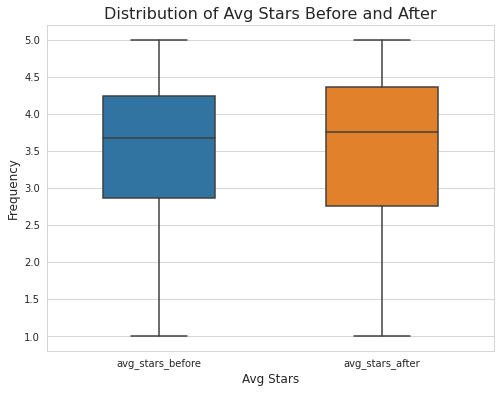

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=avg_stars[['avg_stars_before', 'avg_stars_after']], ax=ax, width=0.5)
ax.set_title('Distribution of Avg Stars Before and After', fontsize=16)
ax.set_xlabel('Avg Stars', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [63]:
# Group the data by business_id
grouped = df.groupby('business_id')

# Calculate the average stars before and after 2020-03-19 for each business_id
avg_stars = grouped.apply(lambda x: pd.Series({
    'avg_stars_before': x.loc[x['date'] < '2020-03-19', 'stars'].mean(),
    'avg_stars_after': x.loc[x['date'] >= '2020-12-11', 'stars'].mean()
}))

# Reset the index to make the business_id a column
avg_stars = avg_stars.reset_index()

print(avg_stars)

                  business_id  avg_stars_before  avg_stars_after
0      ---kPU91CF4Lq2-WlRu9Lw          5.000000         4.428571
1      --0iUa4sNDFiZFrAdIWhZQ               NaN         5.000000
2      --7PUidqRWpRSpXebiyxTg          1.000000              NaN
3      --8IbOsAAxjKRoYsBFL-PA          2.400000              NaN
4      --ZVrH2X2QXBFdCilbirsw          5.000000              NaN
...                       ...               ...              ...
42269  zzfj1-iPfw0cwnOjY0yUgA          3.500000              NaN
42270  zziDpuuJw-Km1J4BaGpBKA          4.000000         4.000000
42271  zzjFdJwXuxBOGe9JeY_EMw          4.277778         3.833333
42272  zznJox6-nmXlGYNWgTDwQQ          1.166667         1.000000
42273  zznZqH9CiAznbkV6fXyHWA               NaN         5.000000

[42274 rows x 3 columns]


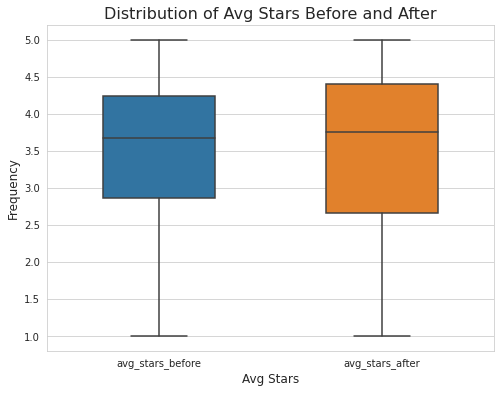

In [64]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=avg_stars[['avg_stars_before', 'avg_stars_after']], ax=ax, width=0.5)
ax.set_title('Distribution of Avg Stars Before and After', fontsize=16)
ax.set_xlabel('Avg Stars', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [66]:
# Calculate difference column
avg_stars['difference'] = avg_stars['avg_stars_after'] - avg_stars['avg_stars_before']

# Print the updated dataframe
print(avg_stars)

                  business_id  avg_stars_before  avg_stars_after  difference
0      ---kPU91CF4Lq2-WlRu9Lw          5.000000         4.428571   -0.571429
1      --0iUa4sNDFiZFrAdIWhZQ               NaN         5.000000         NaN
2      --7PUidqRWpRSpXebiyxTg          1.000000              NaN         NaN
3      --8IbOsAAxjKRoYsBFL-PA          2.400000              NaN         NaN
4      --ZVrH2X2QXBFdCilbirsw          5.000000              NaN         NaN
...                       ...               ...              ...         ...
42269  zzfj1-iPfw0cwnOjY0yUgA          3.500000              NaN         NaN
42270  zziDpuuJw-Km1J4BaGpBKA          4.000000         4.000000    0.000000
42271  zzjFdJwXuxBOGe9JeY_EMw          4.277778         3.833333   -0.444444
42272  zznJox6-nmXlGYNWgTDwQQ          1.166667         1.000000   -0.166667
42273  zznZqH9CiAznbkV6fXyHWA               NaN         5.000000         NaN

[42274 rows x 4 columns]


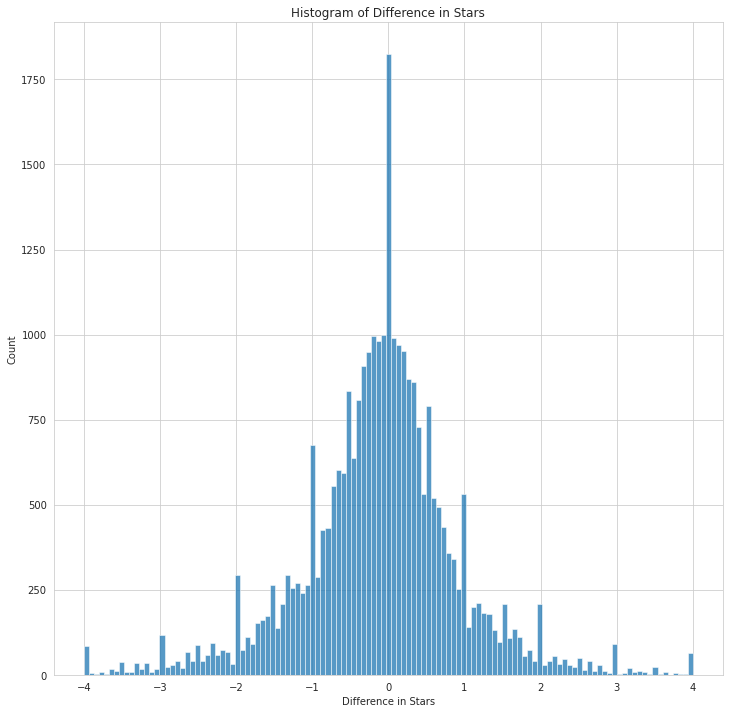

In [67]:
# Create a histogram for diff_stars
fig, ax = plt.subplots(figsize=(12, 12))
sns.histplot(data=avg_stars, x='difference', kde=False)
plt.title('Histogram of Difference in Stars')
plt.xlabel('Difference in Stars')
plt.ylabel('Count')
plt.show()

## Did COVID shut down restaurants?

In [37]:
# Filter the DataFrame to only include businesses that have "is_open = 0"
closed_businesses = df[df['is_open'] == 0]

# Group the reviews by business and select the latest review date for each group
last_review_dates = closed_businesses.groupby('business_id')['date'].max()

# Print the results
print(last_review_dates)

business_id
--7PUidqRWpRSpXebiyxTg    2019-11-02 23:30:02
--8IbOsAAxjKRoYsBFL-PA    2019-02-27 19:41:59
--ZVrH2X2QXBFdCilbirsw    2018-02-24 00:53:41
--qLiYw2ErSmvVwumb2kdw    2019-03-10 22:15:28
-0M0b-XhtFagyLmsBtOe8w    2018-05-13 04:00:27
                                 ...         
zxfqXVgZ_NvLY2lc1DAlJQ    2018-05-17 23:30:21
zxhnAX3MP-DbZF_yG5Jyvw    2019-08-31 23:34:31
zxuVnNVAUm16Sro0dS_lmg    2020-07-01 06:16:51
zzHtFjfM7NvuVM1HTsCLGA    2020-08-03 11:02:53
zzfj1-iPfw0cwnOjY0yUgA    2018-02-10 16:41:56
Name: date, Length: 7623, dtype: object


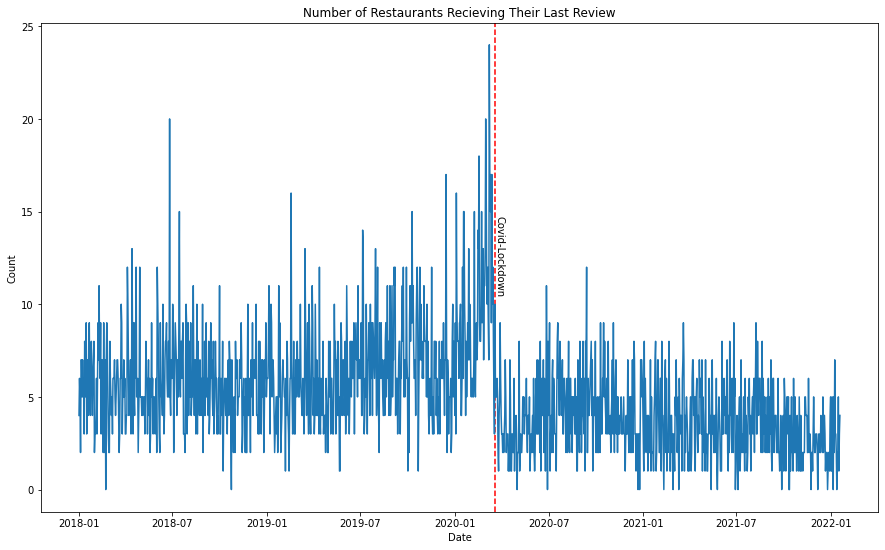

In [58]:
import matplotlib.pyplot as plt
# Convert the "last_review_dates" Series to a DataFrame and reset the index
last_review_dates_df = last_review_dates.to_frame().reset_index()

# Convert the "date" column to a datetime format
last_review_dates_df['date'] = pd.to_datetime(last_review_dates_df['date'])

# Set the "date" column as the index of the DataFrame
last_review_dates_df.set_index('date', inplace=True)

# Resample the data to get the count of last reviews posted for each day
daily_counts = last_review_dates_df.resample('D').size()

# Create a time series plot of the daily counts
fig, ax = plt.subplots(figsize=(15, 9)) 

# Add a vertical line to show COVID lockdown start
ax.axvline(pd.to_datetime('2020-03-19'), color='red', linestyle='--')
ax.text(pd.to_datetime('2020-03-19'), 10.5, 'Covid-Lockdown', rotation=-90)

ax.plot(daily_counts)
ax.set_title('Number of Restaurants Recieving Their Last Review')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

plt.show()

This plot provide a proxy for a business closing by highlighting the number of businesses who recieved there last review on yelp and as of the making of this data, were labeled as "closed"- meaning they are no longer in business.

We suspect there is more at play here since we know COVID-19 shut many businesses down for good. This may more reflect a change in the usage of Yelp or something completely different, but could warrant further investigation.

Perhaps this isn't the best way to track when a business closed, there is most likely better data out there for this.

# Conclusion


From our analysis we can see that there was actually an increase in restaurant reviews immediatly following the pandemic. This is contrary to our hypothesis that restaurants would see lower star ratings, this may most likely be attributed to a higher level of understanding or sympathy for businesses during unheard of circumstances. Although, this immediate spurt of upward trending reviews quickly saw an inflection point and regression towards the mean once vaccinations started rolling out and hiring struggles picked up. After this point reviews on average actually were lower than they were pre-pandemic.

Moving forward it would be interesting to get better data on restaurant closer. Possibly even gather data on PPP loans and see if those restaurants who recieved a loan recieved better ratings than those that did not.